In [1]:
################################################################################
# IMPORT LIBRARIES
################################################################################

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner

# import seaborn as sns
# sns.set_style('darkgrid')

#from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

# %matplotlib inline
# %config InlineBackend.figure_format='retina' # very useful command for high-res images

/tmp/ipykernel_1834373/865553643.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
################################################################################
# SET PATHS
################################################################################

folder_number = 'result_sde_10gen2/'
file_path     = './'+folder_number+'/datafile.txt'
info_path     = './'+folder_number+'/simulation_info.txt'
csv_path_all  = './'+folder_number+'/df_all_gen.csv' 

with open(info_path) as f:
    for line in f:
        if line.startswith("sol_per_pop"):
            sol_per_pop = int(line.split()[-1])
            print('sol_per_pop      =', sol_per_pop)
        elif line.startswith("* Best fitness value reached after"):
            gen_best_fitness = int(line.split()[-2])
            print('gen_best_fitness =', gen_best_fitness)
        elif line.startswith("num_generations"):
            num_generations = int(line.split()[-1])
            print('num_generations  =', num_generations)

num_generations  = 10
sol_per_pop      = 5000
gen_best_fitness = 9


# 1. Plot Fitness

In [3]:
################################################################################
# LOAD DATA
################################################################################

generation = []
best_loss  = []
avg_loss   = []	 
std_loss   = []	 
std_loss_div_sqrt_sol_per_pop = [] 

with open(file_path, 'r') as result_file:
    result_file.readline()
    for line in result_file:
        line_split = line.split()
        generation.append( float(line_split[0]) )
        best_loss.append( float(line_split[1]) )
        avg_loss.append( float(line_split[2]) )
        std_loss.append( float(line_split[3]) )
        std_loss_div_sqrt_sol_per_pop.append( float(line_split[4]) )

In [4]:
print('Train best loss:          ', np.min(best_loss))
print('Train avg loss (last gen):', avg_loss[-1])

Train best loss:           1.5005047656777952
Train avg loss (last gen): 2.8378488832461866


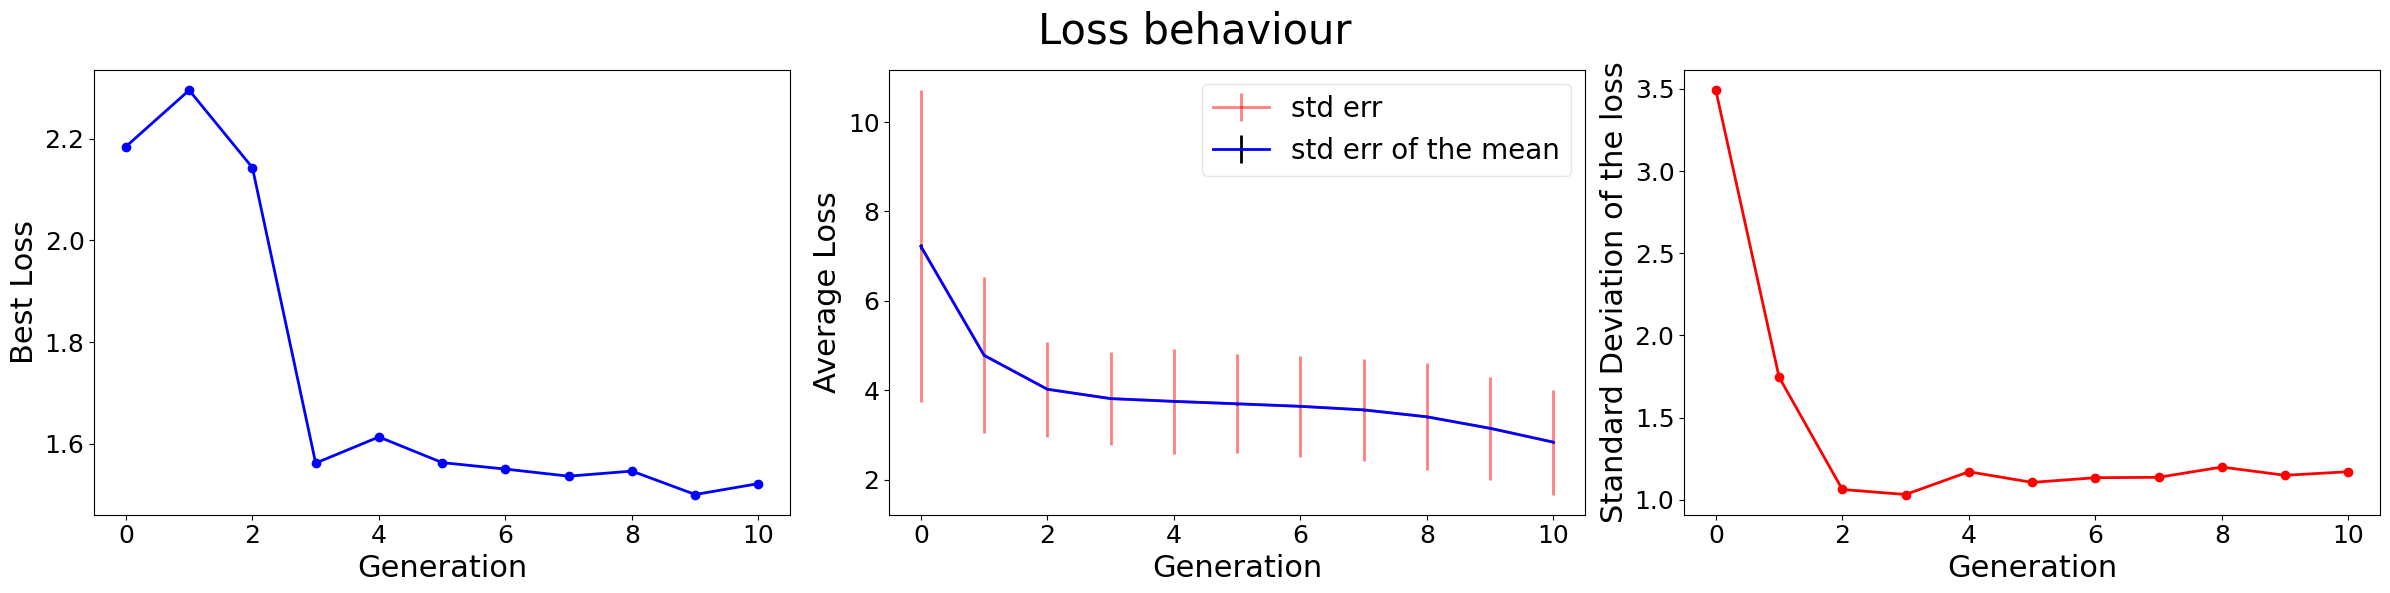

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(24,6))   
################################################################################
# PLOT 1
################################################################################
ax[0].plot(best_loss, ls='-', lw=2, marker='o', c='b')
#plt.set)yscale('log')
ax[0].set_xlabel(r'Generation', size=22)
ax[0].set_ylabel(r'Best Loss',  size=22)
#ax[0].set_aspect('equal')
#ax[0].legend(prop={"size":20}, facecolor='white', framealpha=0.5)
################################################################################
# PLOT 2
################################################################################
ax[1].errorbar(generation, avg_loss, yerr=std_loss,                      ls='-', lw=2, c='r', ecolor='r', alpha=0.5, label='std err')
ax[1].errorbar(generation, avg_loss, yerr=std_loss_div_sqrt_sol_per_pop, ls='-', lw=2, c='b', ecolor='k', alpha=1.0, label='std err of the mean')
#ax[1].yscale('log')
ax[1].set_xlabel(r'Generation',   size=22)
ax[1].set_ylabel(r'Average Loss', size=22)
ax[1].legend(prop={"size":20}, facecolor='white', framealpha=0.5)
################################################################################
# PLOT 3
################################################################################
ax[2].plot(std_loss, ls='-', lw=2, marker='o', c='r')
#ax[2].yscale('log')
ax[2].set_xlabel(r'Generation',                     size=22)
ax[2].set_ylabel(r'Standard Deviation of the loss', size=22)
#ax[2].legend(prop={"size":16}, facecolor='white', framealpha=0.5)
################################################################################
for axx in ax:
    axx.tick_params(axis='both', which='major', labelsize=18)  # Change tick font size
#fig.suptitle('Loss behaviour for v'+str(folder_number), size=30)
fig.suptitle('Loss behaviour', size=30)
fig.tight_layout()
plt.savefig('./'+folder_number+'/fig-loss.pdf')
plt.show()

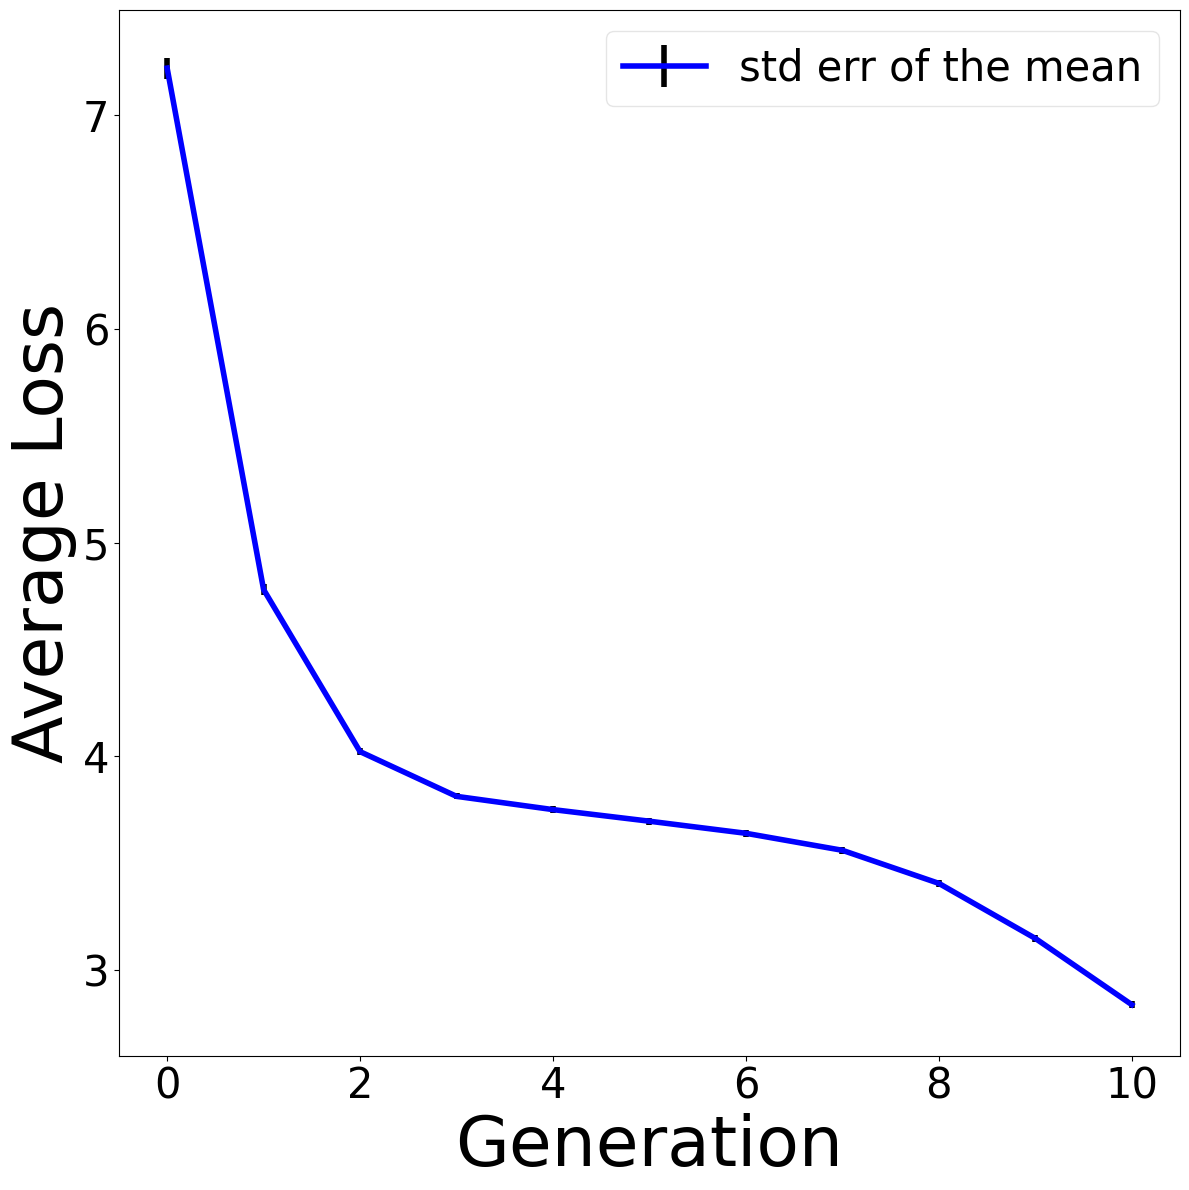

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))   
################################################################################
#ax.errorbar(generation, avg_loss, yerr=std_loss,                      ls='-', lw=2, c='r', ecolor='r', alpha=0.5, label='std err')
ax.errorbar(generation, avg_loss, yerr=std_loss_div_sqrt_sol_per_pop, ls='-', lw=4, c='b', ecolor='k', alpha=1.0, label='std err of the mean')
#ax[0].yscale('log')
ax.set_xlabel(r'Generation',   size=50)
ax.set_ylabel(r'Average Loss', size=50)
ax.legend(prop={"size":30}, facecolor='white', framealpha=0.5)
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
################################################################################
fig.tight_layout()
plt.savefig('./'+folder_number+'/fig-avg-loss.pdf')
plt.show()

In [7]:
# OLD
################################################################################
# MAKE PLOT
################################################################################

# plt.plot(best_loss, ls='-', lw=2, marker='o', c='b')
# #plt.yscale('log')
# plt.xlabel(r'Generation', size=14)
# plt.ylabel(r'Best Loss',  size=14)
# plt.savefig('./'+folder_number+'/_fig01.pdf')
# plt.show()
# 
# 
# plt.errorbar(generation, avg_loss, yerr=std_loss,                      ls='-', lw=2, c='r', ecolor='r', alpha=0.5, label='std err')
# plt.errorbar(generation, avg_loss, yerr=std_loss_div_sqrt_sol_per_pop, ls='-', lw=2, c='b', ecolor='k', alpha=1.0, label='std err of the mean')
# #plt.yscale('log')
# plt.xlabel(r'Generation',   size=14)
# plt.ylabel(r'Average Loss', size=14)
# plt.legend()
# plt.savefig('./'+folder_number+'/_fig02.pdf')
# plt.show()
# 
# 
# plt.plot(std_loss, ls='-', lw=2, marker='o', c='r')
# #plt.yscale('log')
# plt.xlabel(r'Generation',                     size=14)
# plt.ylabel(r'Standard Deviation of the loss', size=14)
# plt.savefig('./'+folder_number+'/_fig03.pdf')
# plt.show()

# 2. Plot Covariances

In [8]:
################################################################################
# LOAD DATA
################################################################################

df_all_gen = pd.read_csv(csv_path_all)
#all_gen   = df_all_gen.to_numpy()
all_gen    = df_all_gen[['q', 'a', 'alpha', 'k', 't_0','norm_A', 'fitness']].to_numpy()
print('shape(all_gen) =', np.shape(all_gen))


#---------
# ONLY FOR V25 OR BELOW
# all_gen[:,5] = 10**(all_gen[:,5])
#---------


#------------------------------------------------------------------------------#

zeroth_gen = all_gen[:sol_per_pop,:]
#print('shape(zeroth_gen) =', np.shape(zeroth_gen))
#------------------------------------------------------------------------------#

first_gen = all_gen[1*sol_per_pop:2*sol_per_pop,:] 
#print('shape(first_gen) =', np.shape(first_gen))
#------------------------------------------------------------------------------#

#gen = 14
#custom_gen = all_gen[gen*sol_per_pop:(gen+1)*sol_per_pop,:] 
#print('shape(custom_gen) =', np.shape(custom_gen))
#------------------------------------------------------------------------------#

#burn_in_gen    = 3
#no_burn_gen    = all_gen[burn_in_gen*sol_per_pop:,:] 
#random_samples = no_burn_gen[np.random.choice(no_burn_gen.shape[0], size=10000, replace=False)]
#print('shape(random_samples) =', np.shape(random_samples))
#------------------------------------------------------------------------------#

best_fitness_gen = all_gen[gen_best_fitness*sol_per_pop:(gen_best_fitness+1)*sol_per_pop,:] 
#print('shape(best_fitness_gen) =', np.shape(best_fitness_gen))
#------------------------------------------------------------------------------#

last_gen = all_gen[-sol_per_pop:,:]
#print('shape(last_gen) =', np.shape(last_gen))
#------------------------------------------------------------------------------#

shape(all_gen) = (55000, 7)


In [9]:
#np.shape(last_gen)

In [10]:
to_use = last_gen

median_values = np.median(to_use, axis=0)
lower_sigma   = median_values - np.percentile(to_use, 16, axis=0)
upper_sigma   = np.percentile(to_use, 84, axis=0) - median_values

print( np.round(median_values, 2) )
print( np.round(lower_sigma, 2) )
print( np.round(upper_sigma, 2) )

print('\nq       =', np.round(np.median(to_use[:,0]),   2), '  ( + ', np.round(np.percentile(to_use[:,0],  84) - np.median(to_use[:,0]),   2), ', - ', np.round(np.median(to_use[:,0])  - np.percentile(to_use[:,0],  16),  2), ')')
print('a       =',   np.round(np.median(to_use[:,1]),   2), '  ( + ', np.round(np.percentile(to_use[:,1],  84) - np.median(to_use[:,1]),   2), ', - ', np.round(np.median(to_use[:,1])  - np.percentile(to_use[:,1],  16),  2), ')')
print('alpha     =',   np.round(np.median(to_use[:,2]),   2), '  ( + ', np.round(np.percentile(to_use[:,2],  84) - np.median(to_use[:,2]),   2), ', - ', np.round(np.median(to_use[:,2])  - np.percentile(to_use[:,2],  16),  2), ')')
print('k    =',   np.round(np.median(to_use[:,3]),   2), '  ( + ', np.round(np.percentile(to_use[:,3],  84) - np.median(to_use[:,3]),   2), ', - ', np.round(np.median(to_use[:,3])  - np.percentile(to_use[:,3],  16),  2), ')')
print('t_0    =',   np.round(np.median(to_use[:,4]),   2), '  ( + ', np.round(np.percentile(to_use[:,4],  84) - np.median(to_use[:,4]),   2), ', - ', np.round(np.median(to_use[:,4])  - np.percentile(to_use[:,4],  16),  2), ')')
print('norm_A     =',   np.round(np.median(to_use[:,5]), 2), '  ( + ', np.round(np.percentile(to_use[:,5], 84) - np.median(to_use[:,5]), 2), ', - ', np.round(np.median(to_use[:,5]) - np.percentile(to_use[:,5], 16), 2), ')')


[3.3000e-01 1.4000e-01 2.7100e+00 3.0200e+00 3.7600e+01 1.5624e+02
 4.0000e-01]
[3.000e-02 1.300e-01 1.020e+00 2.350e+00 1.633e+01 3.060e+01 1.200e-01]
[2.0000e-02 1.3200e+00 9.6000e-01 2.6000e-01 8.1200e+00 1.3682e+02
 5.0000e-02]

q       = 0.33   ( +  0.02 , -  0.03 )
a       = 0.14   ( +  1.32 , -  0.13 )
alpha     = 2.71   ( +  0.96 , -  1.02 )
k    = 3.02   ( +  0.26 , -  2.35 )
t_0    = 37.6   ( +  8.12 , -  16.33 )
norm_A     = 156.24   ( +  136.82 , -  30.6 )


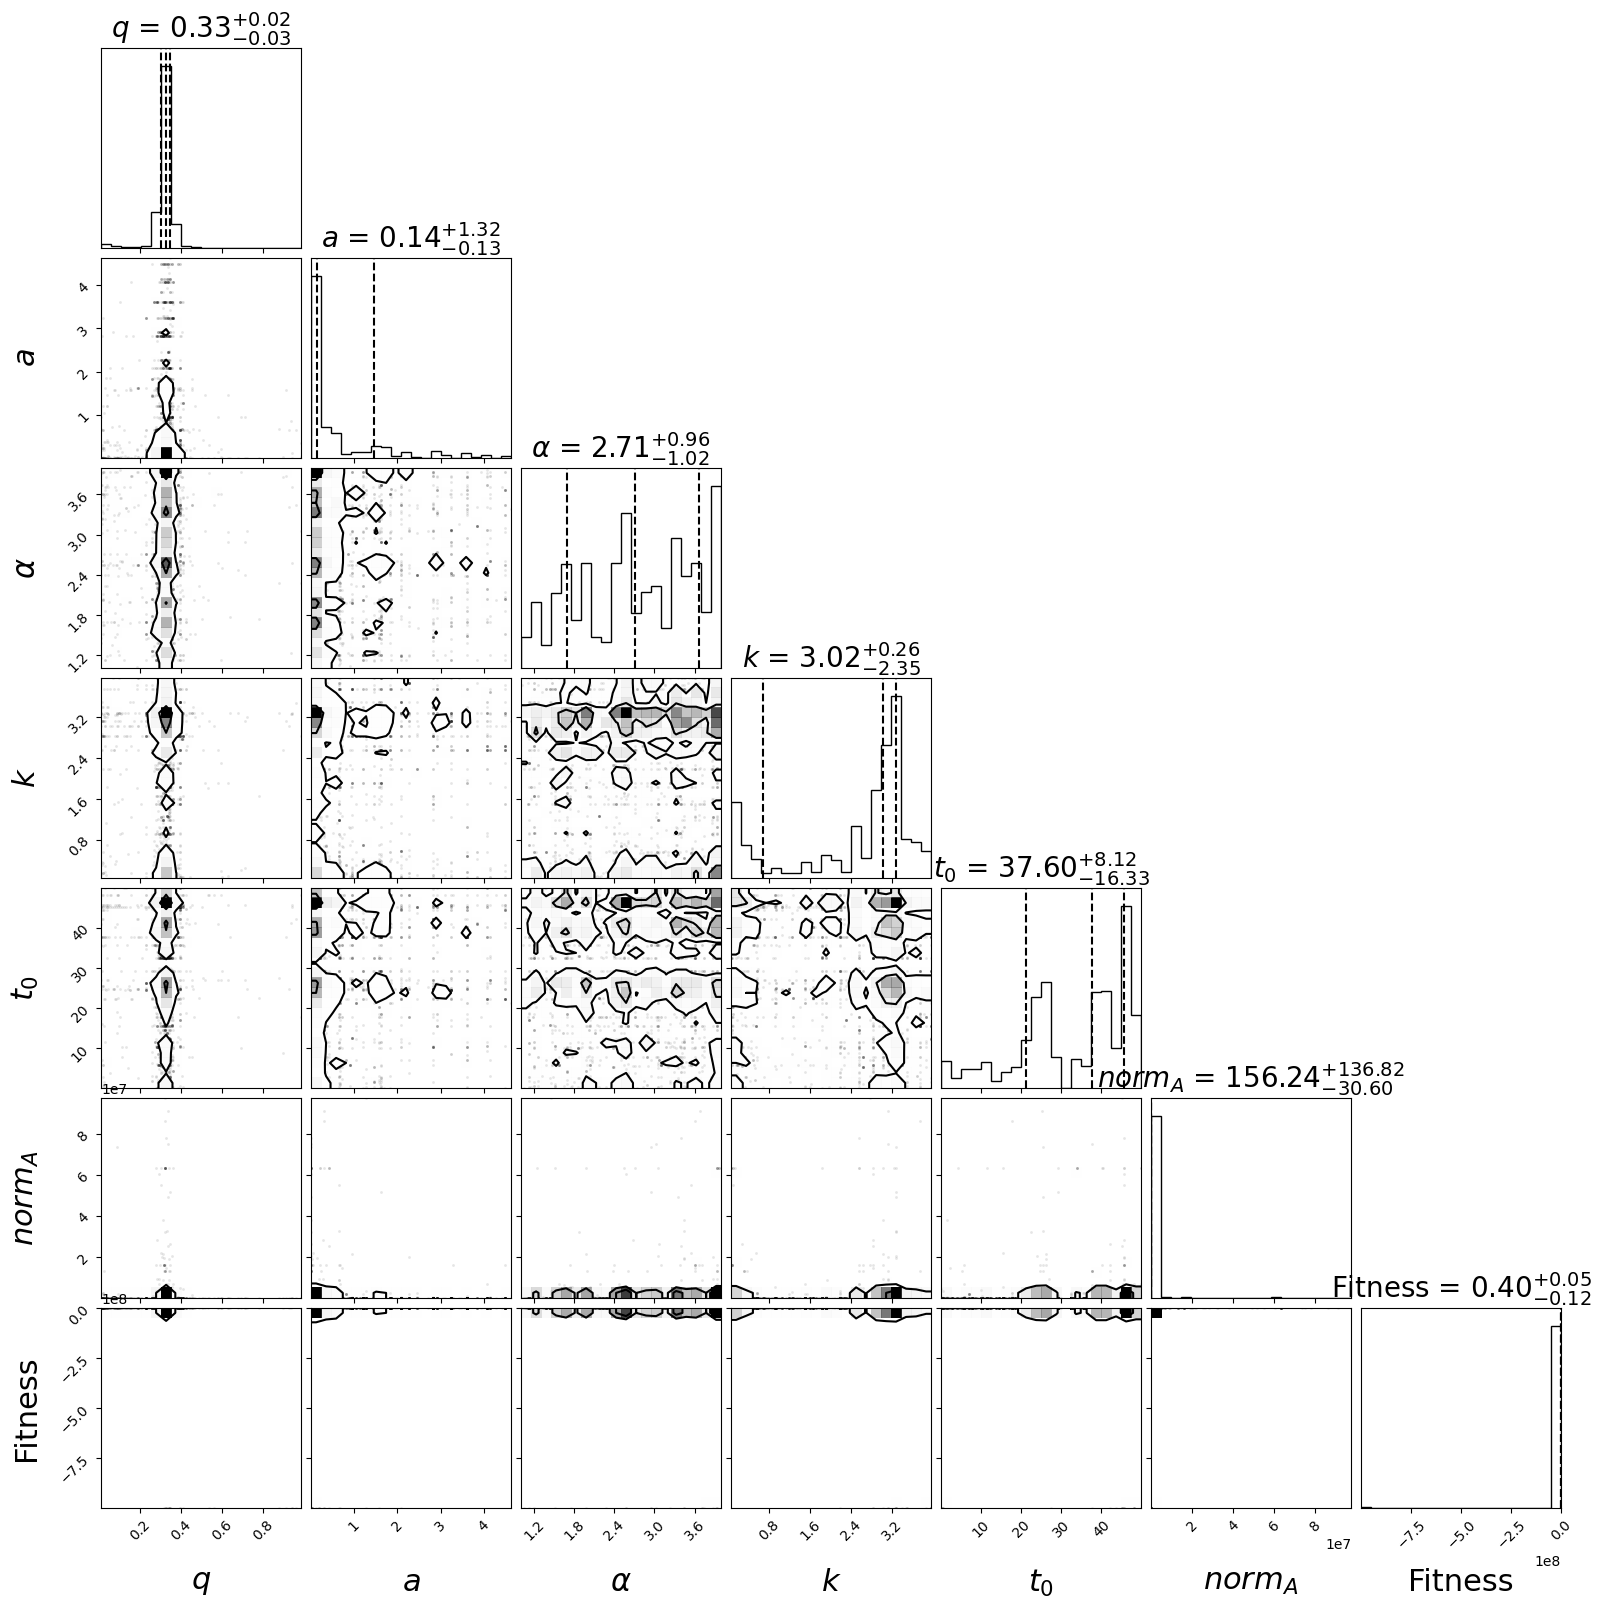

In [11]:
figure = corner.corner(
    #all_gen,
    #zeroth_gen,
    #first_gen,
    #custom_gen,
    #random_samples,
    #best_fitness_gen,
    last_gen,
    #to_use,
    labels=[
        r"$q$",
        r"$a$",
        r"$\alpha$",
        r"$k$",
        r"$t_0$",
        r"$norm_A$",
        r"Fitness"
    ],
    quantiles=[0.16, 0.5, 0.84],
    levels=[0.39, 0.86], # 1,2 sigmas 
    show_titles=True,
    fill_contours=False,
    smooth=0.1,
    #plot_density=False,
    #plot_datapoints=False,
    #show_titles=True,
    #max_n_ticks=3,
    #title_fmt=".2E",
    label_kwargs={"fontsize": 22},
    title_kwargs={"fontsize": 20},
)
plt.savefig('./'+folder_number+'/fig-correlations.pdf')
plt.show()

# 3. Plot Parameter time-behavior

In [12]:
avg_q        = np.zeros(num_generations+1)
std_q        = np.zeros(num_generations+1)
#
avg_a       = np.zeros(num_generations+1)
std_a      = np.zeros(num_generations+1)
#
avg_alpha     = np.zeros(num_generations+1)
std_alpha     = np.zeros(num_generations+1)
#
avg_k    = np.zeros(num_generations+1)
std_k    = np.zeros(num_generations+1)
#
avg_t_0    = np.zeros(num_generations+1)
std_t_0    = np.zeros(num_generations+1)
#
avg_norm_A   = np.zeros(num_generations+1)
std_norm_A   = np.zeros(num_generations+1)
#
for i in range(num_generations+1):
    avg_q[i]        = np.mean( df_all_gen[ 'q'        ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_q[i]        = np.std(  df_all_gen[ 'q'        ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    #
    avg_a[i]       = np.mean( df_all_gen[ 'a'       ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_a[i]       = np.std(  df_all_gen[ 'a'       ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    #
    avg_alpha[i]     = np.mean( df_all_gen[ 'alpha'     ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_alpha[i]     = np.std(  df_all_gen[ 'alpha'     ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    #
    avg_k[i]    = np.mean( df_all_gen[ 'k'    ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_k[i]    = np.std(  df_all_gen[ 'k'    ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    #
    avg_t_0[i]    = np.mean( df_all_gen[ 't_0'    ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_t_0[i]    = np.std(  df_all_gen[ 't_0'    ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    #
    avg_norm_A[i]   = np.mean( df_all_gen[ 'norm_A'   ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_norm_A[i]   = np.std(  df_all_gen[ 'norm_A'   ].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )

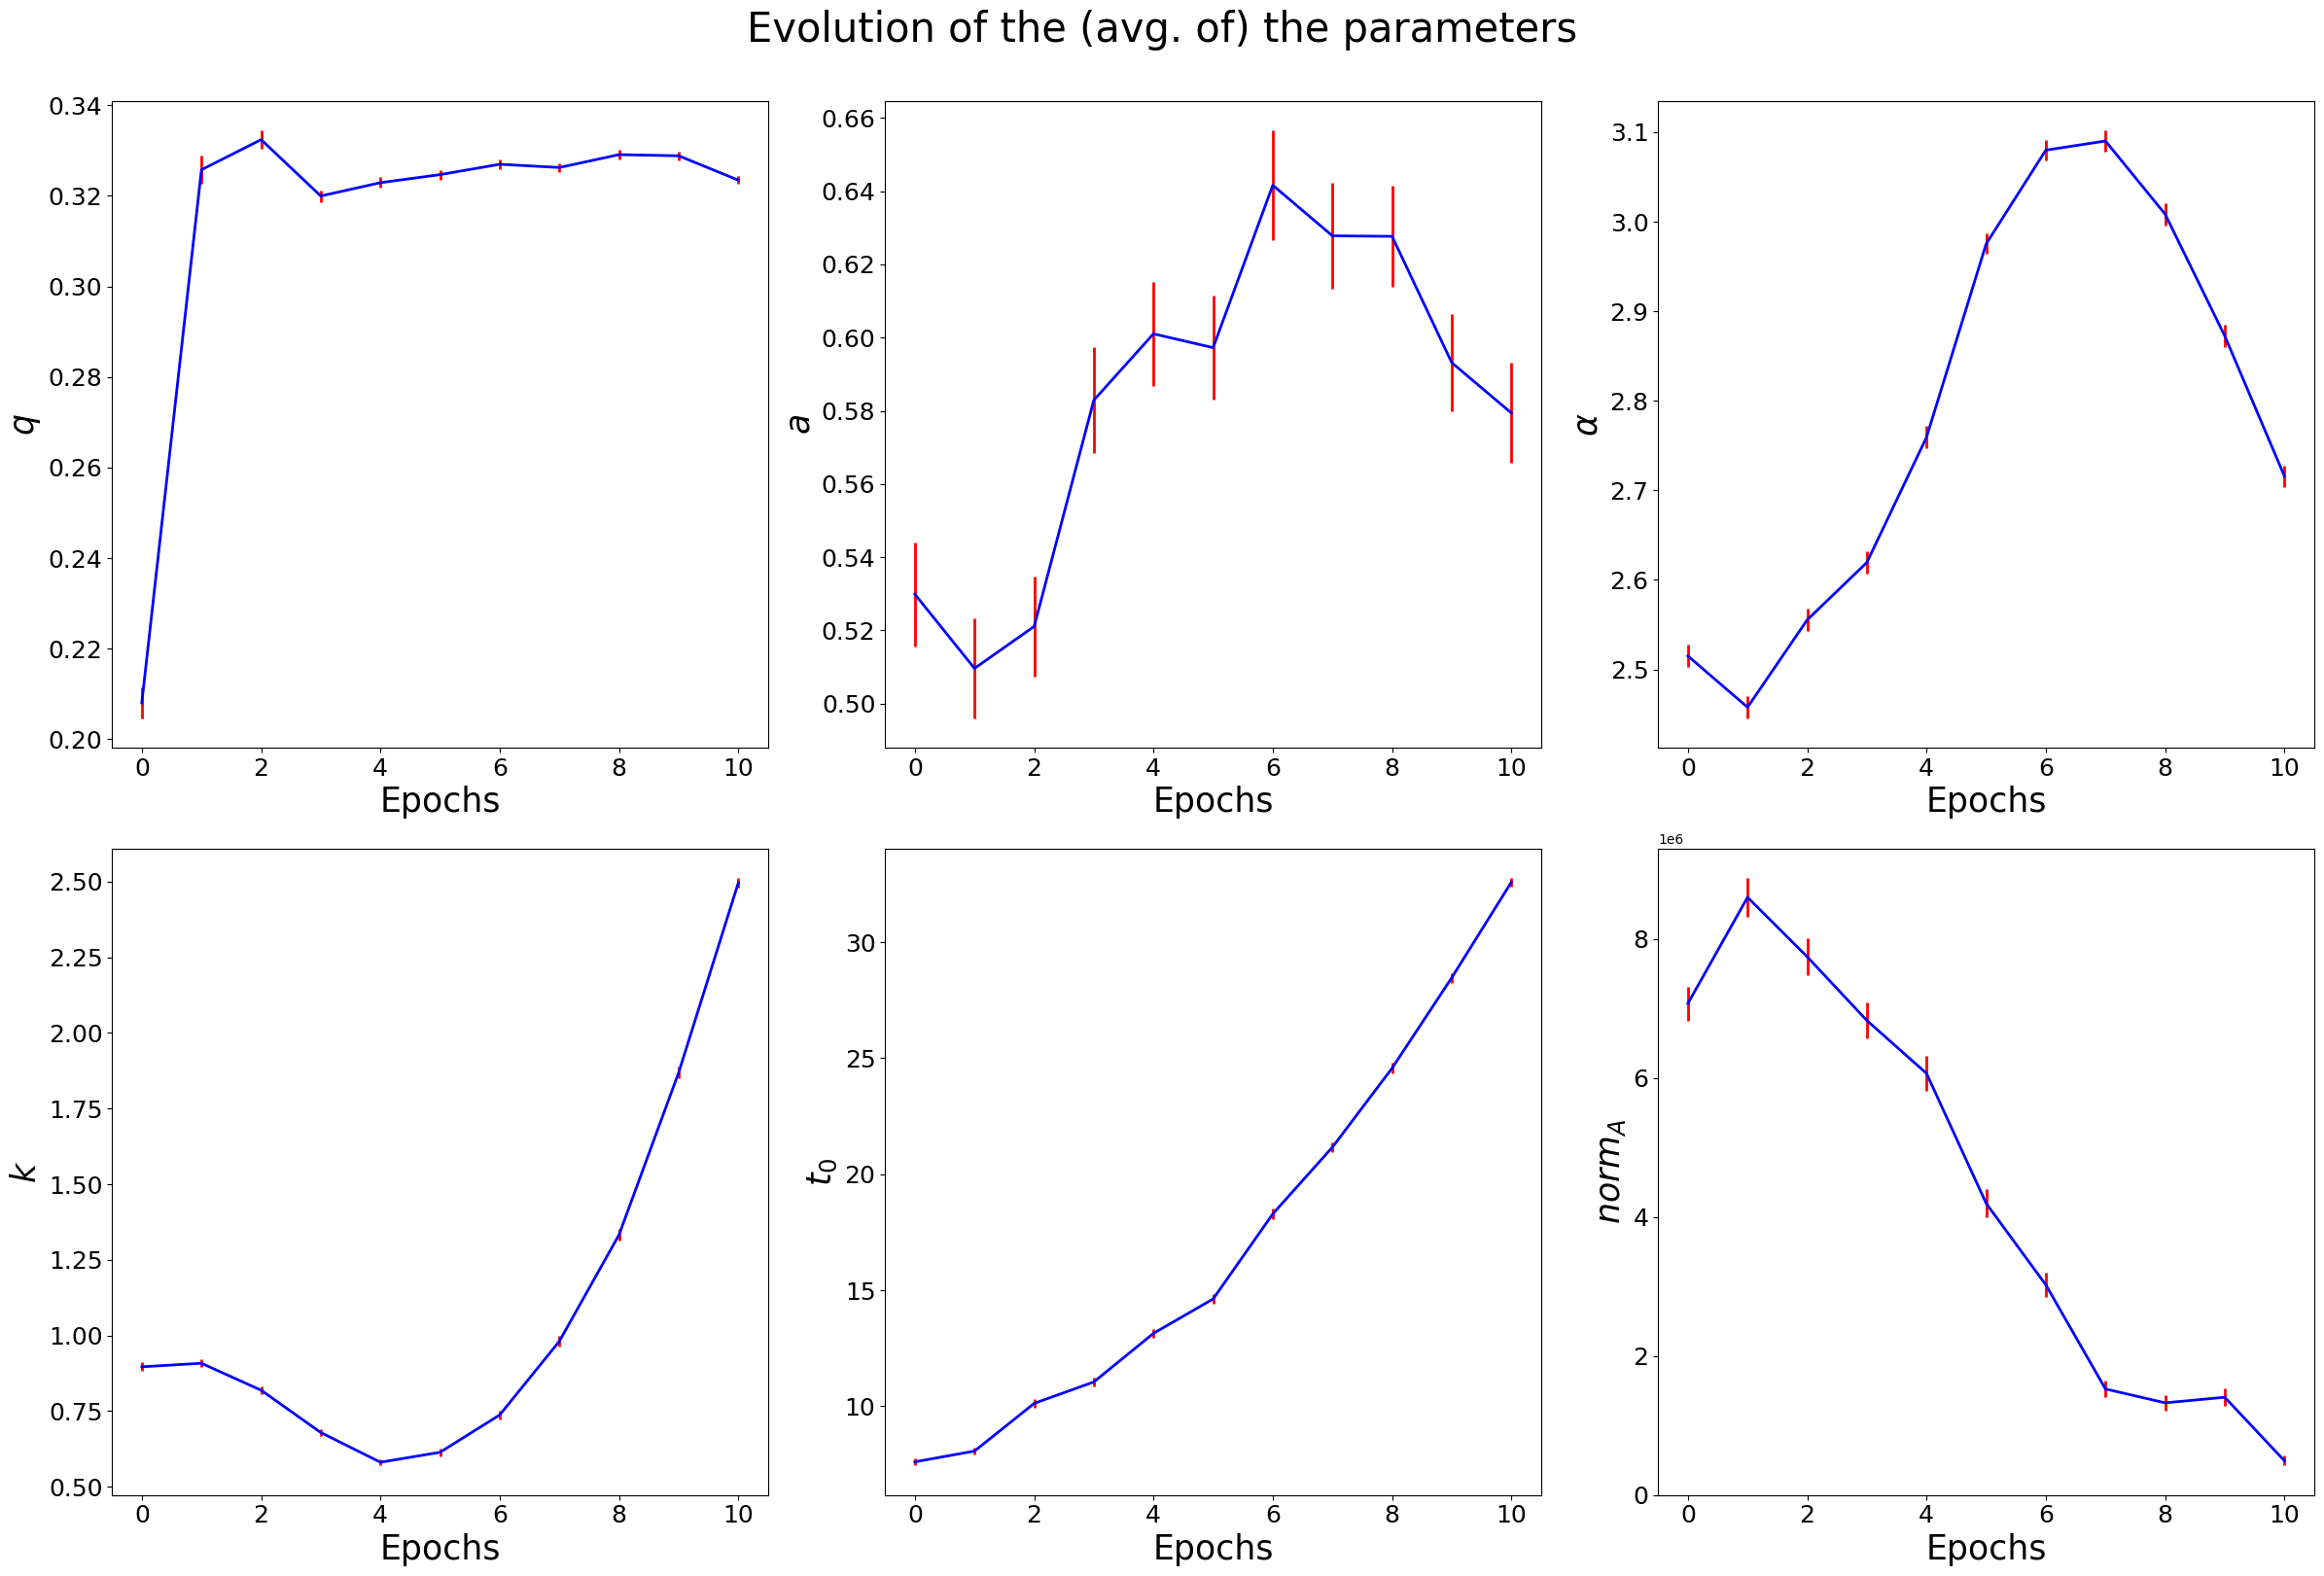

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(24,16))   
################################################################################
# PLOT 1
################################################################################
ax[0,0].errorbar(np.arange(num_generations+1), avg_q, yerr=std_q/np.sqrt(sol_per_pop), 
                 ls='-', lw=2, c='b', ecolor='r')
#ax[0,0].set_ylim(0.80, 1.7)
ax[0,0].set_xlabel('Epochs', size=25)
ax[0,0].set_ylabel(r'$q$', size=25)
#ax[0,0].set_title(r'$0.8 \leq q \leq 1.7$', size=25)
################################################################################
# PLOT 2
################################################################################
ax[0,1].errorbar(np.arange(num_generations+1), avg_a, yerr=std_a/np.sqrt(sol_per_pop), 
                 ls='-', lw=2, c='b', ecolor='r')
#ax[0,1].set_ylim(0.80, 1.7)
ax[0,1].set_xlabel('Epochs', size=25)
ax[0,1].set_ylabel(r'$a$', size=25)
#ax[0,1].set_title(r'$0.8 \leq a \leq 1.7$', size=25)
################################################################################
# PLOT 3
################################################################################
ax[0,2].errorbar(np.arange(num_generations+1), avg_alpha, yerr=std_alpha/np.sqrt(sol_per_pop), 
                 ls='-', lw=2, c='b', ecolor='r')
#ax[0,2].set_ylim(1, 15)
ax[0,2].set_xlabel('Epochs', size=25)
ax[0,2].set_ylabel(r'$\alpha$', size=25)
#ax[0,2].set_title(r'$1 \leq \alpha \leq 15$', size=25)
################################################################################
# PLOT 4
################################################################################
ax[1,0].errorbar(np.arange(num_generations+1), avg_k, yerr=std_k/np.sqrt(sol_per_pop), 
                 ls='-', lw=2, c='b', ecolor='r')
#ax[1,0].set_ylim(-1.5, -0.30*(1+1.e-6))
ax[1,0].set_xlabel('Epochs', size=25)
ax[1,0].set_ylabel(r'$k$', size=25)
#ax[1,0].set_title(r'$-1.5 \leq k \leq -0.3$', size=25)
################################################################################
# PLOT 5
################################################################################
ax[1,1].errorbar(np.arange(num_generations+1), avg_t_0, yerr=std_t_0/np.sqrt(sol_per_pop), 
                 ls='-', lw=2, c='b', ecolor='r')
#ax[1,1].set_ylim(0, 0.30)
ax[1,1].set_xlabel('Epochs', size=25)
ax[1,1].set_ylabel(r'$t_0$', size=25)
#ax[1,1].set_title(r'$0 \leq t_0 \leq 0.3$', size=25)
################################################################################
# PLOT 6
################################################################################
ax[1,2].errorbar(np.arange(num_generations+1), avg_norm_A, yerr=std_norm_A/np.sqrt(sol_per_pop), 
                 ls='-', lw=2, c='b', ecolor='r')
#ax[1,2].set_ylim(1.e-2, 0.064*(1-1.e-6))
ax[1,2].set_xlabel('Epochs', size=25)
ax[1,2].set_ylabel(r'$norm_A$', size=25)
#ax[1,2].set_yscale('log')
#ax[1,2].set_title(r'$0.01 \leq norm_A \leq 0.064$', size=25)
################################################################################
################################################################################
#ax[3,2].set_visible(False)
################################################################################
ax[0,0].tick_params(axis='both', labelsize=18)
ax[0,1].tick_params(axis='both', labelsize=18)
ax[0,2].tick_params(axis='both', labelsize=18)
ax[1,0].tick_params(axis='both', labelsize=18)
ax[1,1].tick_params(axis='both', labelsize=18)
ax[1,2].tick_params(axis='both', labelsize=18)
#ax[2,0].tick_params(axis='both', labelsize=15)
#ax[2,1].tick_params(axis='both', labelsize=15)
#ax[2,2].tick_params(axis='both', labelsize=15)
#ax[3,0].tick_params(axis='both', labelsize=15)
#ax[3,1].tick_params(axis='both', labelsize=15)
#fig.suptitle('Evolution of the (avg. of) the 11 parameters for v'+str(folder_number), size=30)
fig.suptitle('Evolution of the (avg. of) the parameters', size=30,y=1.01)
fig.tight_layout()
plt.savefig('./'+folder_number+'/fig-params.pdf')
plt.show()

# 4. Real vs. Fake

In [2]:
path_simulati_OLD = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/simulations/batse-fig/'
path_simulati     = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/simulations/batse-v35/'
path_reali        = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/DATA/CGRO_BATSE/'

### SIMULATED 
# Single peak:        lc
# Double peak:        lc
# Moderately complex: lc
# Erratic:            lc

### SIMULATED OLD
# Single peak:        lc2
# Double peak:        lc32
# Moderately complex: lc0
# Erratic:            lc34

### REAL
# Single peak:        00469
# Double peak:        00143
# Moderately complex: 00394 
# Erratic:            01156  

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(16,10))

################################################################################
# REAL
################################################################################
x,y,yerr = np.loadtxt(path_reali+'06375_all_bs.out', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_reali+'00469_all_bs.out', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[0,0].step(x,y, color = 'black', lw=1, where = 'post')
ax[0,0].set_xlim(-1.5,18)
ax[0,0].set_ylim(-70,230)
ax[0,0].set_ylabel('counts/64 ms', size=14)
ax[0,0].set_title('\emph{Real} BATSE GRBs', size=20)
max_pos = ax[0,0].get_xlim()[1]
max_y = np.max(y)
ax[0,0].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'black', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[0,0].text(15, 100, '\#06375', fontsize = 20, color = 'black')
ax[0,0].xaxis.set_tick_params(labelsize=12)
ax[0,0].yaxis.set_tick_params(labelsize=12)

x,y,yerr = np.loadtxt(path_reali+'02083_all_bs.out', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[1,0].step(x,y, color = 'black', lw=0.9, where = 'post')
ax[1,0].set_xlim(-10,50)
ax[1,0].set_ylabel('counts/64 ms', size=14)
max_pos = ax[1,0].get_xlim()[1]
max_y = np.max(y)
ax[1,0].errorbar(max_pos - 0.1 * max_pos,  max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'black', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[1,0].text(41, 6000, '\#02083', fontsize = 20, color = 'black')
ax[1,0].xaxis.set_tick_params(labelsize=12)
ax[1,0].yaxis.set_tick_params(labelsize=12)

x,y,yerr = np.loadtxt(path_reali+'01157_all_bs.out', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[2,0].step(x,y, color = 'black', lw=0.6, where = 'post')
ax[2,0].set_xlim(-5,65)
ax[2,0].set_ylabel('counts/64 ms', size=14)
max_pos = ax[2,0].get_xlim()[1]
max_y = np.max(y)
ax[2,0].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'black', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[2,0].text(54.5, 1500, '\#01157', fontsize = 20, color = 'black')
ax[2,0].xaxis.set_tick_params(labelsize=12)
ax[2,0].yaxis.set_tick_params(labelsize=12)

x,y,yerr = np.loadtxt(path_reali+'02831_all_bs.out', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[3,0].step(x,y, color = 'black', lw=0.6, where = 'post')
ax[3,0].set_xlim(-1,240)
ax[3,0].set_ylabel('counts/64 ms', size=14)
ax[3,0].set_xlabel('Time since trigger [s]', size=20)
max_pos = ax[3,0].get_xlim()[1]
max_y = np.max(y)
ax[3,0].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'black', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[3,0].text(205, 5500, '\#02831', fontsize = 20, color = 'black')
ax[3,0].xaxis.set_tick_params(labelsize=12)
ax[3,0].yaxis.set_tick_params(labelsize=12)

################################################################################
#SIMULATED
################################################################################

x,y,yerr = np.loadtxt(path_simulati+'lc10.txt', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_simulati_OLD+'lc2.txt', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[0,1].step(x,y, color = 'black', lw=1, where = 'post')
ax[0,1].set_xlim(0.5,20)
ax[0,1].set_title('\emph{Simulated} BATSE GRBs', size=20)
max_pos = ax[0,1].get_xlim()[1]
max_y = np.max(y)
ax[0,1].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'black', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[0,1].xaxis.set_tick_params(labelsize=12)
ax[0,1].yaxis.set_tick_params(labelsize=12)

x,y,yerr = np.loadtxt(path_simulati+'lc41.txt', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_simulati+'lc22.txt', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_simulati_OLD+'lc32.txt', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[1,1].step(x,y, color = 'black', lw=0.35, where = 'post')
ax[1,1].set_xlim(-10,150)
max_pos = ax[1,1].get_xlim()[1]
max_y = np.max(y)
ax[1,1].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'black', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[1,1].xaxis.set_tick_params(labelsize=12)
ax[1,1].yaxis.set_tick_params(labelsize=12)

x,y,yerr = np.loadtxt(path_simulati+'lc34.txt', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_simulati_OLD+'lc0.txt', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[2,1].step(x,y, color = 'black', lw=0.35, where = 'post')
ax[2,1].set_xlim(-5,100)
max_pos = ax[2,1].get_xlim()[1]
max_y = np.max(y)
ax[2,1].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'black', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[2,1].xaxis.set_tick_params(labelsize=12)
ax[2,1].yaxis.set_tick_params(labelsize=12)

x,y,yerr = np.loadtxt(path_simulati+'lc18.txt', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_simulati_OLD+'lc34.txt', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[3,1].step(x,y, color = 'black', lw=0.35, where = 'post')
ax[3,1].set_xlim(-5,240)
ax[3,1].set_xlabel('Time since trigger [s]', size=20)
max_pos = ax[3,1].get_xlim()[1]
max_y = np.max(y)
ax[3,1].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'black', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[3,1].xaxis.set_tick_params(labelsize=12)
ax[3,1].yaxis.set_tick_params(labelsize=12)

################################################################################
################################################################################

plt.tight_layout()
plt.savefig('fig-real-fake-paper.pdf')
plt.show()

In [ ]:
import matplotlib.patches as patches

#true_label = True
true_label = False

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(16,10))

################################################################################
# REAL
################################################################################
x,y,yerr = np.loadtxt(path_reali+'06375_all_bs.out', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_reali+'00469_all_bs.out', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[0,0].step(x,y, color = 'blue', lw=1, where = 'post')
ax[0,0].set_xlim(-1.5,18)
ax[0,0].set_ylim(-70,230)
ax[0,0].set_ylabel('counts/64 ms', size=14)
max_pos = ax[0,0].get_xlim()[1]
max_y = np.max(y)
ax[0,0].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'blue', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
if true_label:
    ax[0,0].text(15, 100, '\#06375', fontsize = 20, color = 'black')
ax[0,0].xaxis.set_tick_params(labelsize=12)
ax[0,0].yaxis.set_tick_params(labelsize=12)
if true_label:
    ax[0,0].add_patch(patches.Rectangle(xy=(ax[0,0].get_xlim()[0], ax[0,0].get_ylim()[0]),
                                        width=ax[0,0].get_xlim()[1]-ax[0,0].get_xlim()[0],
                                        height=ax[0,0].get_ylim()[1]-ax[0,0].get_ylim()[0], 
                                        linewidth=12, color='lime', fill=False))

x,y,yerr = np.loadtxt(path_reali+'02083_all_bs.out', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[1,1].step(x,y, color = 'blue', lw=0.9, where = 'post')
ax[1,1].set_xlim(-10,50)
ax[1,0].set_ylabel('counts/64 ms', size=14)
max_pos = ax[1,1].get_xlim()[1]
max_y = np.max(y)
ax[1,1].errorbar(max_pos - 0.1 * max_pos,  max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'blue', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
if true_label:
    ax[1,1].text(41, 6000, '\#02083', fontsize = 20, color = 'black')
ax[1,1].xaxis.set_tick_params(labelsize=12)
ax[1,1].yaxis.set_tick_params(labelsize=12)
if true_label:
    ax[1,1].add_patch(patches.Rectangle(xy=(ax[1,1].get_xlim()[0], ax[1,1].get_ylim()[0]),
                                        width=ax[1,1].get_xlim()[1]-ax[1,1].get_xlim()[0],
                                        height=ax[1,1].get_ylim()[1]-ax[1,1].get_ylim()[0], 
                                        linewidth=12, color='lime', fill=False))

x,y,yerr = np.loadtxt(path_reali+'01157_all_bs.out', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[2,0].step(x,y, color = 'blue', lw=0.6, where = 'post')
ax[2,0].set_xlim(-5,65)
ax[2,0].set_ylabel('counts/64 ms', size=14)
max_pos = ax[2,0].get_xlim()[1]
max_y = np.max(y)
ax[2,0].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'blue', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
if true_label:
    ax[2,0].text(54.5, 1500, '\#01157', fontsize = 20, color = 'black')
ax[2,0].xaxis.set_tick_params(labelsize=12)
ax[2,0].yaxis.set_tick_params(labelsize=12)
if true_label:
    ax[2,0].add_patch(patches.Rectangle(xy=(ax[2,0].get_xlim()[0], ax[2,0].get_ylim()[0]),
                                        width=ax[2,0].get_xlim()[1]-ax[2,0].get_xlim()[0],
                                        height=ax[2,0].get_ylim()[1]-ax[2,0].get_ylim()[0], 
                                        linewidth=12, color='lime', fill=False))

x,y,yerr = np.loadtxt(path_reali+'02831_all_bs.out', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[3,1].step(x,y, color = 'blue', lw=0.6, where = 'post')
ax[3,1].set_xlim(-1,240)
ax[3,0].set_ylabel('counts/64 ms', size=14)
ax[3,1].set_xlabel('Time since trigger [s]', size=20)
max_pos = ax[3,1].get_xlim()[1]
max_y = np.max(y)
ax[3,1].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'blue', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
if true_label:
    ax[3,1].text(205, 5500, '\#02831', fontsize = 20, color = 'black')
ax[3,1].xaxis.set_tick_params(labelsize=12)
ax[3,1].yaxis.set_tick_params(labelsize=12)
if true_label:
    ax[3,1].add_patch(patches.Rectangle(xy=(ax[3,1].get_xlim()[0], ax[3,1].get_ylim()[0]),
                                        width=ax[3,1].get_xlim()[1]-ax[3,1].get_xlim()[0],
                                        height=ax[3,1].get_ylim()[1]-ax[3,1].get_ylim()[0], 
                                        linewidth=12, color='lime', fill=False))

################################################################################
#SIMULATED
################################################################################

x,y,yerr = np.loadtxt(path_simulati+'lc10.txt', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_simulati_OLD+'lc2.txt', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[0,1].step(x,y, color = 'blue', lw=1, where = 'post')
ax[0,1].set_xlim(0.5,20)
max_pos = ax[0,1].get_xlim()[1]
max_y = np.max(y)
ax[0,1].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'blue', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[0,1].xaxis.set_tick_params(labelsize=12)
ax[0,1].yaxis.set_tick_params(labelsize=12)
if true_label:
    ax[0,1].add_patch(patches.Rectangle(xy=(ax[0,1].get_xlim()[0], ax[0,1].get_ylim()[0]),
                                        width=ax[0,1].get_xlim()[1]-ax[0,1].get_xlim()[0],
                                        height=ax[0,1].get_ylim()[1]-ax[0,1].get_ylim()[0], 
                                        linewidth=12, color='red', fill=False))

x,y,yerr = np.loadtxt(path_simulati+'lc41.txt', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_simulati+'lc22.txt', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_simulati_OLD+'lc32.txt', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[1,0].step(x,y, color = 'blue', lw=0.35, where = 'post')
ax[1,0].set_xlim(-10,150)
max_pos = ax[1,0].get_xlim()[1]
max_y = np.max(y)
ax[1,0].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'blue', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[1,0].xaxis.set_tick_params(labelsize=12)
ax[1,0].yaxis.set_tick_params(labelsize=12)
if true_label:
    ax[1,0].add_patch(patches.Rectangle(xy=(ax[1,0].get_xlim()[0], ax[1,0].get_ylim()[0]),
                                        width=ax[1,0].get_xlim()[1]-ax[1,0].get_xlim()[0],
                                        height=ax[1,0].get_ylim()[1]-ax[1,0].get_ylim()[0], 
                                        linewidth=12, color='red', fill=False))

x,y,yerr = np.loadtxt(path_simulati+'lc34.txt', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_simulati_OLD+'lc0.txt', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[2,1].step(x,y, color = 'blue', lw=0.35, where = 'post')
ax[2,1].set_xlim(-5,100)
max_pos = ax[2,1].get_xlim()[1]
max_y = np.max(y)
ax[2,1].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'blue', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[2,1].xaxis.set_tick_params(labelsize=12)
ax[2,1].yaxis.set_tick_params(labelsize=12)
if true_label:
    ax[2,1].add_patch(patches.Rectangle(xy=(ax[2,1].get_xlim()[0], ax[2,1].get_ylim()[0]),
                                        width=ax[2,1].get_xlim()[1]-ax[2,1].get_xlim()[0],
                                        height=ax[2,1].get_ylim()[1]-ax[2,1].get_ylim()[0], 
                                        linewidth=12, color='red', fill=False))

x,y,yerr = np.loadtxt(path_simulati+'lc18.txt', usecols = (0,1,2), unpack = True)
#x,y,yerr = np.loadtxt(path_simulati_OLD+'lc34.txt', usecols = (0,1,2), unpack = True)
repr_error = np.mean(yerr)
ax[3,0].step(x,y, color = 'blue', lw=0.35, where = 'post')
ax[3,0].set_xlim(-5,240)
ax[3,0].set_xlabel('Time since trigger [s]', size=20)
max_pos = ax[3,0].get_xlim()[1]
max_y = np.max(y)
ax[3,0].errorbar(max_pos - 0.1 * max_pos, max_y - 0.1 * max_y, yerr = repr_error, marker = None, color = 'blue', lw = 0.5, fmt='o', markersize = 0, capsize = 1)
ax[3,0].xaxis.set_tick_params(labelsize=12)
ax[3,0].yaxis.set_tick_params(labelsize=12)
if true_label:
    ax[3,0].add_patch(patches.Rectangle(xy=(ax[3,0].get_xlim()[0], ax[3,0].get_ylim()[0]),
                                        width=ax[3,0].get_xlim()[1]-ax[3,0].get_xlim()[0],
                                        height=ax[3,0].get_ylim()[1]-ax[3,0].get_ylim()[0], 
                                        linewidth=12, color='red', fill=False))

################################################################################
################################################################################

plt.tight_layout()
if true_label:
    plt.savefig('fig-real-fake-2.pdf')
else:
    plt.savefig('fig-real-fake-1.pdf')
plt.show()

In [ ]:
path_simulati = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/simulations/batse-v35/'
for i in range(40,42):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    x,y,yerr = np.loadtxt(path_simulati+'lc'+str(i)+'.txt', usecols = (0,1,2), unpack = True)
    ax.step(x,y, color = 'black', lw=0.5, where = 'post', label=str(i))
    ax.set_xlim(-10,150)
    ax.set_xlabel('Time since trigger [s]', size=20)
    plt.legend()
    plt.show()

In [ ]:
files   = os.listdir(path_reali)
real_lc = [file for file in files if file.endswith('all_bs.out')]

for i in range(130,150):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    x,y,yerr = np.loadtxt(path_reali+real_lc[i], usecols = (0,1,2), unpack = True)
    ax.step(x,y, color = 'black', lw=1, where = 'post', label=real_lc[i])
    ax.set_xlim(-10,200)
    plt.legend()
    plt.show()

# 5. $k$ factors

In [ ]:
k_batse = np.loadtxt('../lc_pulse_avalanche/log10_fluence_over_counts_CGRO_BATSE.txt')
k_swift = np.loadtxt('../lc_pulse_avalanche/log10_fluence_over_counts_Swift_BAT.txt')
k_fermi = np.loadtxt('../lc_pulse_avalanche/log10_fluence_over_counts_Fermi_GBM.txt')

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey='row', facecolor='w')

### Plot 1
ax[0].hist(k_batse, bins=30, density=False, ec='black', label='BATSE')
ax[0].set_xticks([-10.5, -10.0, -9.5, -9.0])
ax[0].xaxis.set_tick_params(length=4, labelsize=12)
ax[0].yaxis.set_tick_params(length=4, labelsize=12)
ax[0].set_xlabel(r'$k$', size=18)
ax[0].set_ylabel(r'No. of GRBs', size=18)
ax[0].set_title(r'$CGRO$/BATSE', size=20)
ax[0].grid(False)
# ax[0].legend(fontsize=20)
### Plot 2
ax[1].hist(k_swift, bins=30, density=False, ec='black', label='Swift')
ax[1].set_xticks([-6.5, -6.0, -5.5])
ax[1].xaxis.set_tick_params(length=4, labelsize=12)
ax[1].yaxis.set_tick_params(length=4, labelsize=12)
ax[1].set_xlabel(r'$k$', size=18)
ax[1].set_title(r'$Swift$/BAT', size=20)
ax[1].grid(False)
# ax[1].legend(fontsize=20)
### Plot 3
ax[2].hist(k_fermi, bins=30, density=False, ec='black', label='Fermi')
ax[2].xaxis.set_tick_params(length=4, labelsize=12)
ax[2].yaxis.set_tick_params(length=4, labelsize=12)
ax[2].set_xlabel(r'$k$', size=18)
ax[2].set_title(r'$FERMI$/GBM', size=20)
ax[2].grid(False)
# ax[2].legend(fontsize=20)

###
plt.tight_layout()
plt.savefig('k_factor_distributions.pdf', format='pdf')
plt.show()

# DEBUG

In [ ]:
################################################################################
# MAKE PLOT
################################################################################

ndim, nsamples = 5, 10000
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
figure = corner.corner(
    samples,
    labels=[
        r"$x$",
        r"$y$",
        r"$\log \alpha_1$",
        r"$\log \alpha_2$",
        r"$\Gamma \, [\mathrm{parsec}]$",
    ],
    quantiles=[0.16, 0.5, 0.84],
    levels=[0.39, 0.86], # 1,2 sigmas 
    show_titles=True,
    fill_contours=False,
    #smooth=0.1,
    #plot_density=False,
    #plot_datapoints=False,
    #show_titles=True,
    #max_n_ticks=3,
    #title_fmt=".2E",
    label_kwargs={"fontsize": 16},
    title_kwargs={"fontsize": 16},
)
plt.show()

In [ ]:
################################################################################
# SMOOTHLY-BROKEN POWER LAW
################################################################################

def sbpl(x, a_1, a_2, x_0, x_m):
    s = 20
    return (((x_m/x_0)**(a_1*s) + (x_m/x_0)**(a_2*s))/((x/x_0)**(a_1*s) + (x/x_0)**(a_2*s)))**(1/s)

# a_1 = 0.8
# a_2 = 1.5
# x_0 = 1e-6
# x_m = 1e-8
# x_M = 1e-4

# x = np.linspace(x_m, x_M, 512)
# y = sbpl(x, a_1, a_2, x_0, x_m)

# log_x = np.log10(x)
# log_y = np.log10(y)

# fig, ax = plt.subplots(1, 1)
# ax.plot(log_x, log_y, lw=3)
# plt.show()